In [82]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import analysis as an
import pendulums as pd


In [2]:
an.compare_simpleDouble()

main frequency for simple pendulum: 0.693  period: 1.442
main frequency for double pendulum: 0.707  period: 1.415


In [2]:
an.compare_linearNonlinear()

main frequency for pendulum with small angle approximation: 1.307  period: 0.765
main frequency for general pendulum: 1.307  period: 0.765


In [75]:
data = pd.rk4DobPend(0.5, 0.001, 0.5, 0.001, 90, 0.0, 0.0, 0.0, .01, 
                     75, linearized=False)
t = data[0]
phi1 = data[1]
phi2 = data[2]
w1 = data[3]
w2 = data[4]
L1 = data[5]
L2 = data[6]
m1 = data[7]
m2 = data[8]
g = data[9]

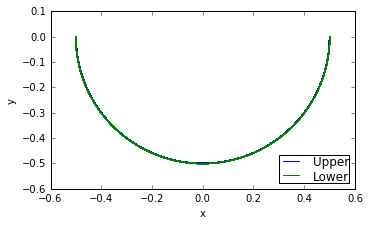

In [76]:
an.graphTrajectory(L1, L2, phi1, phi2)

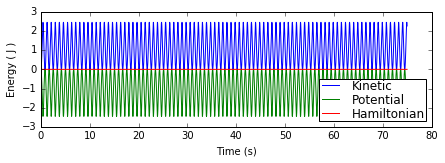

In [77]:
an.graphEnergy(L1, L2, m1, m2, phi1, phi2, w1, w2, t)

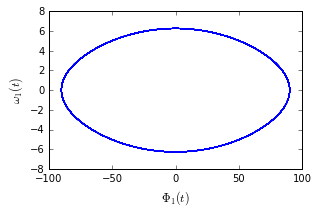

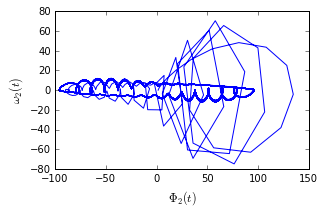

In [78]:
an.graphPhaseDiagrams(phi1, phi2, w1, w2)

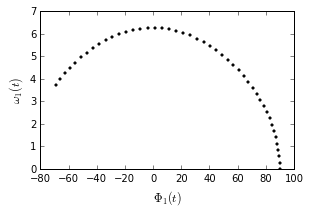

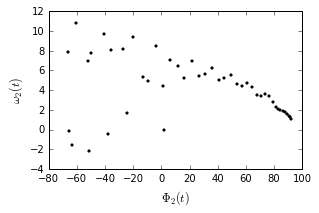

In [79]:
an.graphPoincareSlice(phi1,phi2, w1, w2, t, 0.001)

In [81]:
an.bifurcationMass()

KeyboardInterrupt: 

In [19]:
# Bifurcation Diagram
import numpy as np
import matplotlib.pyplot as plt
import pendulums as pd
% matplotlib inline

Phimax = 3.14
Phisteps = 0.01
PhiPoints = int(Phimax/Phisteps) + 1
tmax = 50
tsteps = 0.01
tpoints = int(tmax/tsteps)
massmax = 10
massmin = 1
masssteps = 0.01
masspoints = int((massmax - massmin)/masssteps)

massPointsArray = np.arange(massmin, massmax, masssteps)
Mass = np.zeros([masspoints, tpoints])
PhiPointsArray = np.arange(0, Phimax+0.01, Phisteps)
Phi = np.zeros([PhiPoints, tpoints])

for i, phi0 in enumerate(PhiPointsArray):
    Phi[i] = pd.rk4DobPend(0.5, 0.5, 0.5, 0.5, phi0, 0, 0, 0, tsteps, tmax, purpose="bifurcation angle")

#for i, mass in enumerate(massPointsArray):
#    Mass[i] = pd.rk4DobPend(mass, 0.5, 0.5, 0.8, 45, 0, 0, 0, tsteps, tmax, purpose="bifurcation mass")

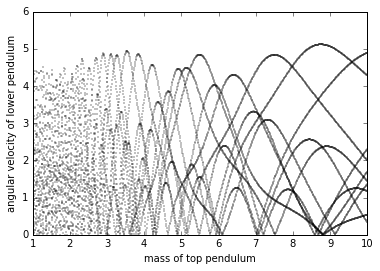

In [22]:
plt.plot(PhiPointsArray[::], np.abs(Phi[::, 4500::50]),'r.', color='black', ms=1, alpha=1);
plt.xlabel("mass of top pendulum")
plt.ylabel("angular velocity of lower pendulum")
plt.savefig("report bifurcation 45 mass")
plt.show()